# DeepFace integration (currently POC, will enhance later)

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from deepface import DeepFace

In [3]:
def add_noise(image, intensity=0.05):
    row, col, ch = image.shape
    mean = 0
    sigma = intensity * 255
    gauss = np.random.normal(mean, sigma, (row, col, ch))
    gauss = gauss.reshape(row, col, ch)
    noisy = image + gauss
    return np.clip(noisy, 0, 255).astype(np.uint8)

In [11]:
img_path = "data/raw/KDEF/AM06/AM06AFS.JPG"
img_raw_bgr = cv2.imread(img_path)

if img_raw_bgr is None:
    print(f"Error: Could not find image at {img_path}")
else:
    img_raw_rgb = cv2.cvtColor(img_raw_bgr, cv2.COLOR_BGR2RGB)

In [12]:
img_degraded_rgb = add_noise(img_raw_rgb, intensity=0.15)

result_orig = DeepFace.analyze(
    img_path=img_raw_rgb,
    actions=["emotion"],
    detector_backend="opencv",
    enforce_detection=False,
    silent=True,
)

result_deg = DeepFace.analyze(
    img_path=img_degraded_rgb,
    actions=["emotion"],
    detector_backend="opencv",
    enforce_detection=False,
    silent=True,
)

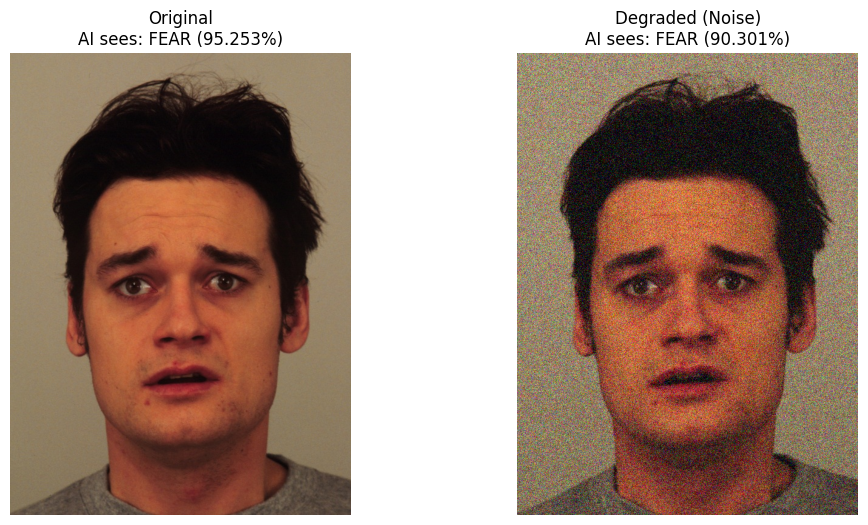

In [13]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

axs[0].imshow(img_raw_rgb)
axs[0].set_title(
    f"Original\nAI sees: {result_orig[0]['dominant_emotion'].upper()} ({result_orig[0]['emotion'][result_orig[0]['dominant_emotion']]:.3f}%)"
)
axs[0].axis("off")

axs[1].imshow(img_degraded_rgb)
axs[1].set_title(
    f"Degraded (Noise)\nAI sees: {result_deg[0]['dominant_emotion'].upper()} ({result_deg[0]['emotion'][result_deg[0]['dominant_emotion']]:.3f}%)"
)
axs[1].axis("off")

plt.show()

In [14]:
print("Full emotion spread for real image:")
for emotion, score in result_orig[0]["emotion"].items():
    print(f"{emotion}: {score:.3f}%")

Full emotion spread for real image:
angry: 0.123%
disgust: 0.000%
fear: 95.253%
happy: 0.155%
sad: 1.102%
surprise: 2.248%
neutral: 1.119%


In [15]:
print("Full emotion spread for degraded image:", result_deg[0]["emotion"])
for emotion, score in result_deg[0]["emotion"].items():
    print(f"{emotion}: {score:.3f}%")

Full emotion spread for degraded image: {'angry': np.float32(0.55323595), 'disgust': np.float32(0.0009892758), 'fear': np.float32(90.3011), 'happy': np.float32(0.39646068), 'sad': np.float32(0.24509108), 'surprise': np.float32(7.1537457), 'neutral': np.float32(1.3493786)}
angry: 0.553%
disgust: 0.001%
fear: 90.301%
happy: 0.396%
sad: 0.245%
surprise: 7.154%
neutral: 1.349%
